**IMPORT LIBRARIES**



In [465]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [466]:
#Read File
df_Original = pd.read_csv('/kaggle/input/ev-data/EV_Data.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df_Original.copy()

In [467]:
df.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


**DATA PREPROCESSING**

In [468]:
df.isnull().sum()

Unnamed: 0                                                              0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [469]:
df.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [470]:
df.shape

(1000, 15)

In [471]:
#Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed: 0                                                            1000 non-null   int64  
 1   Age                                                                   1000 non-null   int64  
 2   City                                                                  1000 non-null   object 
 3   Profession                                                            1000 non-null   object 
 4   Marital Status                                                        1000 non-null   object 
 5   Education                                                             1000 non-null   object 
 6   No. of Family members                                                 1000 non-null   int64  
 7 

In [472]:
df['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38])

In [473]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [ ]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})

In [474]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7])

In [475]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [476]:
df.columns

Index(['Unnamed: 0', 'Age', 'City', 'Profession', 'Marital Status',
       'Education', 'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [477]:
df.drop('Unnamed: 0', axis=1, inplace = True)

**DATA VISUALIZATION**

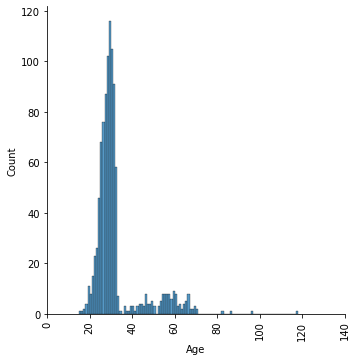

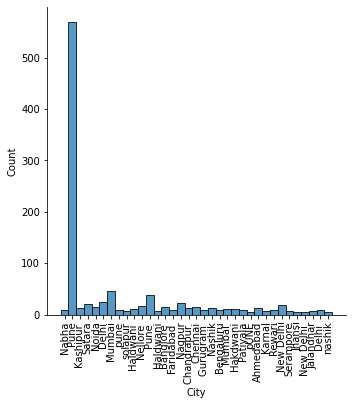

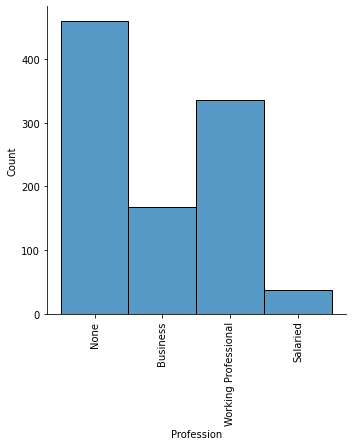

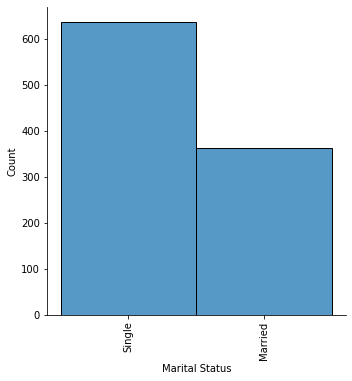

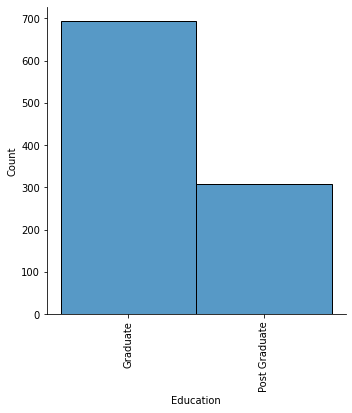

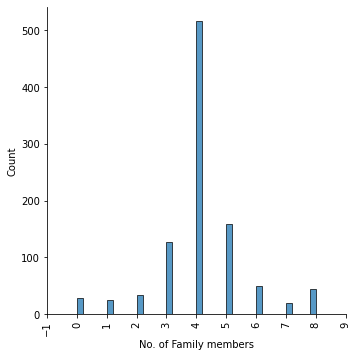

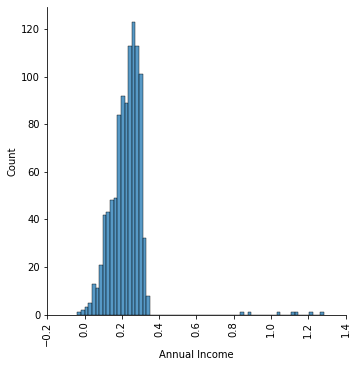

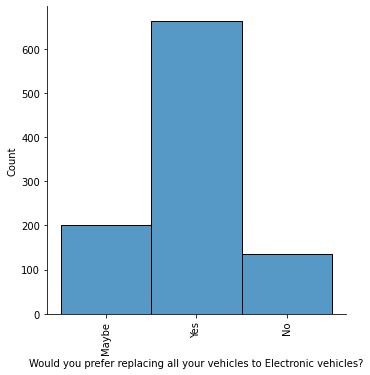

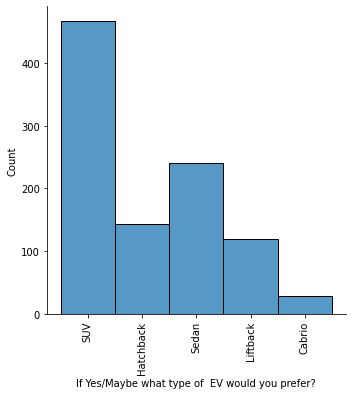

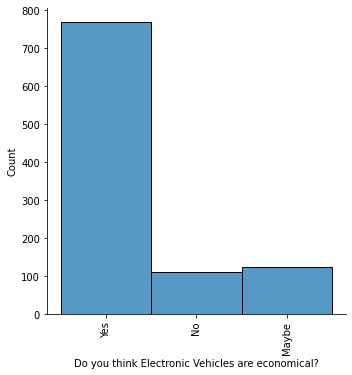

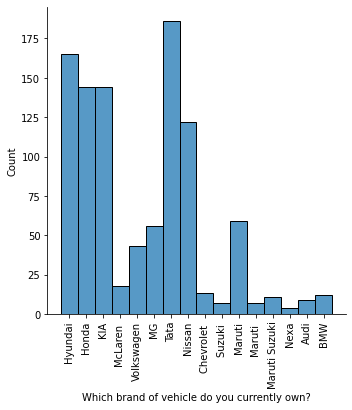

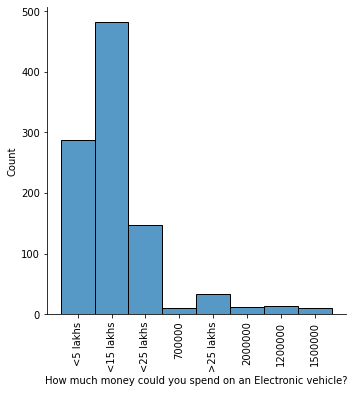

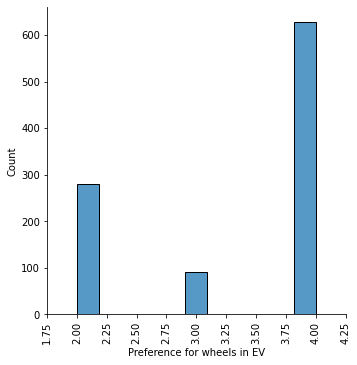

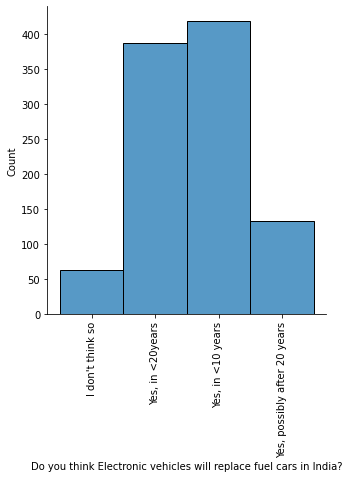

In [478]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)
    

In [ ]:
#Most people prefer 4 wheels vehicle.
#Most people believe Electronic vehicle will replace fuel cars in India in less than 20 years.

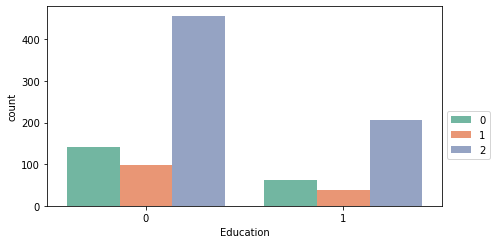

In [530]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

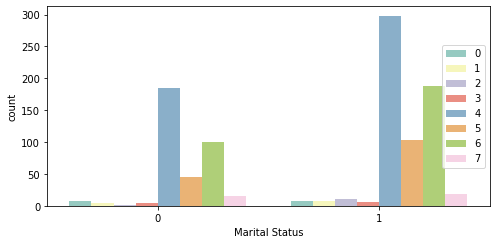

In [529]:
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = df, palette = 'Set3')
plt.legend(loc='center right')
plt.show()

In [484]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000,1000.000,1000.000,1000.000
mean,31.800,4.118,2258341.824,3.349
std,11.295,1.470,999355.758,0.888
min,15.000,0.000,-376150.863,2.000
25%,26.000,4.000,1782115.520,2.000
50%,29.000,4.000,2329246.375,4.000
75%,31.000,5.000,2753169.612,4.000
max,118.000,8.000,12821282.030,4.000


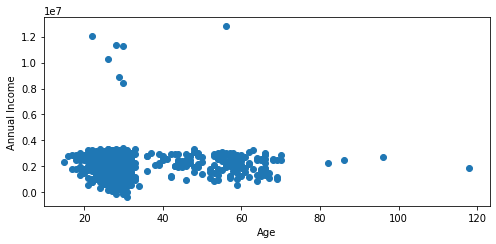

In [485]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

<AxesSubplot:xlabel='Age', ylabel='count'>

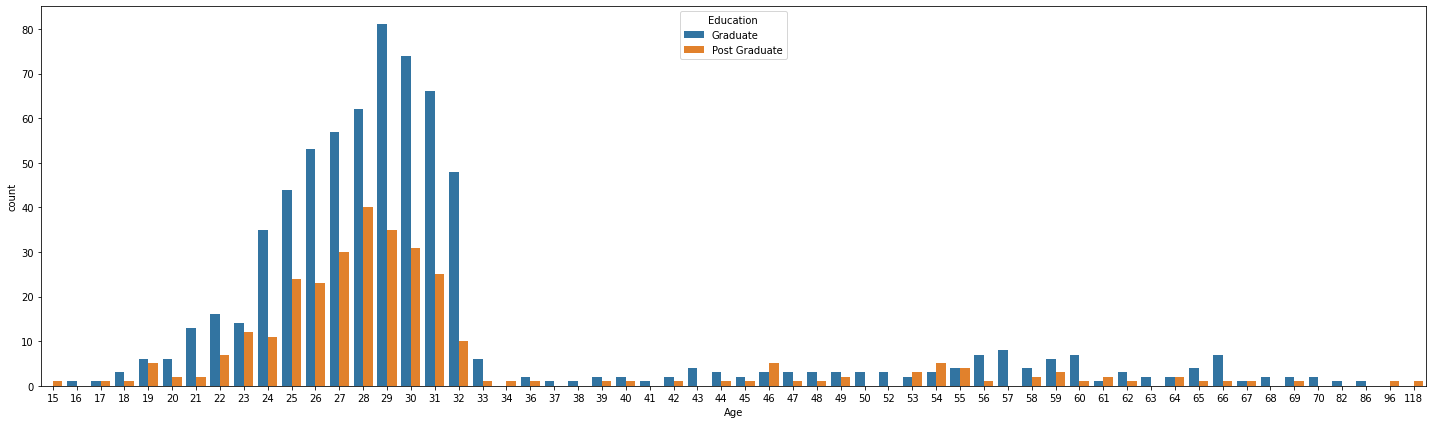

In [486]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

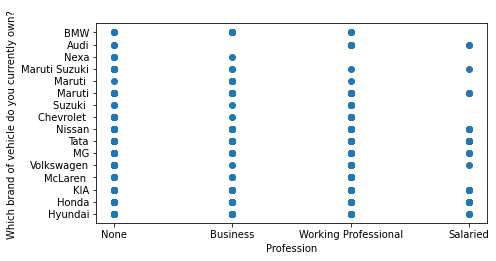

In [487]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])

<AxesSubplot:xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

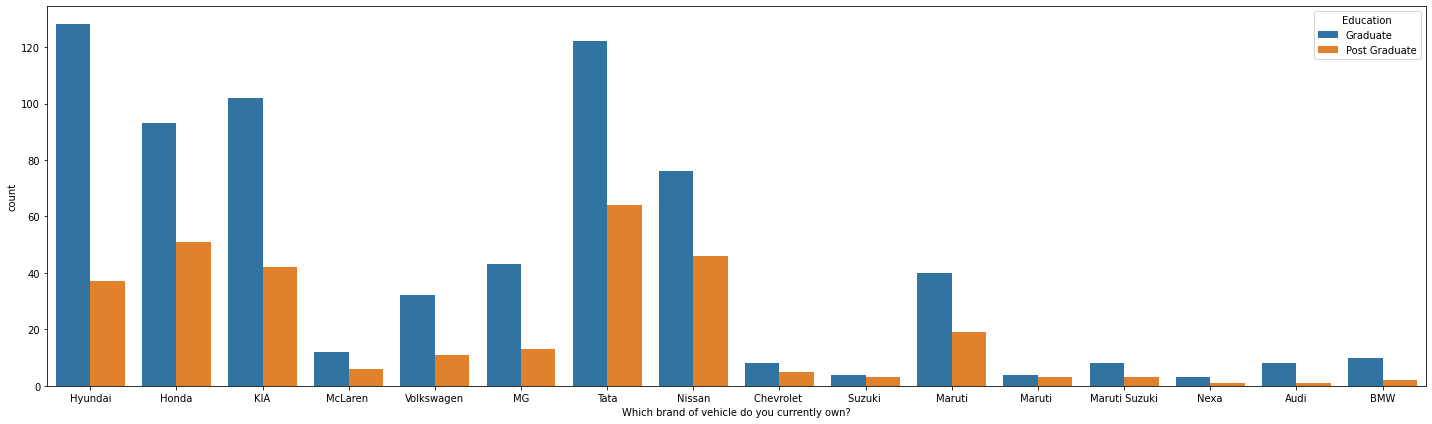

In [488]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")

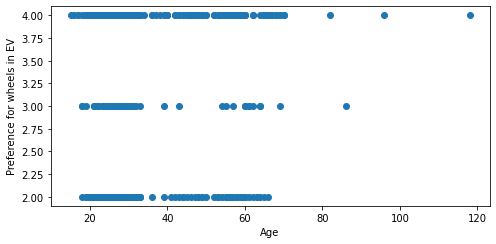

In [489]:
plt.xlabel('Age')
plt.ylabel('Preference for wheels in EV')
plt.scatter(df['Age'],df['Preference for wheels in EV'])

<AxesSubplot:>

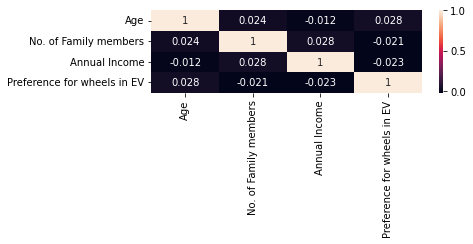

In [490]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)

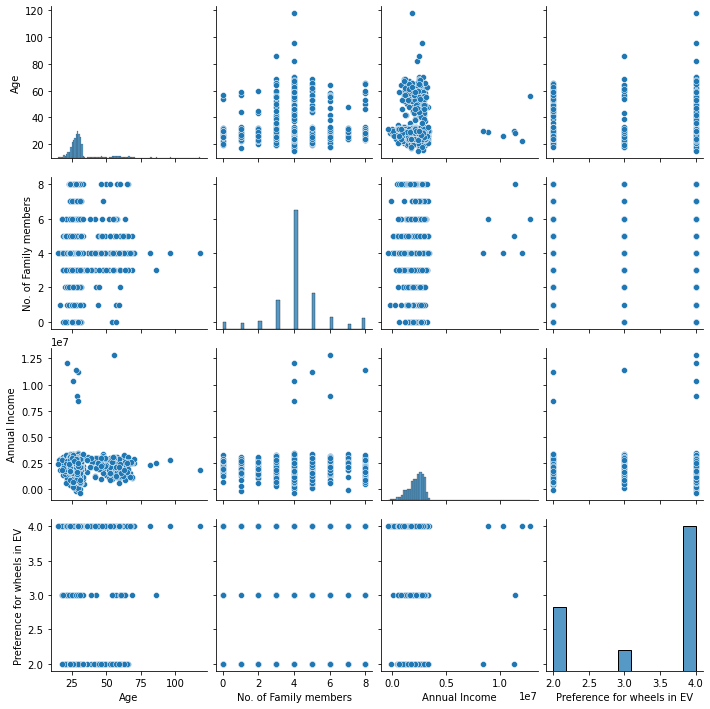

In [491]:
sns.pairplot(df)

In [492]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [493]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [494]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of  EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [495]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,12,1,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,19,1,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,10,1,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,19,0,1,0,3,2832379.739,0,1,1,4,6,4,1
4,26,21,1,1,0,4,2638750.576,2,4,2,10,4,4,2


In [496]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [524]:
X = df.drop(['City'],axis=1)
y = df['City']

In [525]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [526]:
X = df.iloc[:,:-1]


In [527]:
calc_vif(X)

,variables,VIF
0,Age,8.081
1,City,9.257
2,Profession,2.912
3,Marital Status,2.720
4,Education,1.448
5,No. of Family members,8.331
6,Annual Income,5.779
7,Would you prefer replacing all your vehicles t...,4.160
8,If Yes/Maybe what type of EV would you prefer?,7.176
9,Do you think Electronic Vehicles are economical?,6.306


**VIF equal to 1 = variables are not correlated,
VIF between 1 and 5 = variables are moderately correlated,
VIF greater than 5 = variables are highly correlated**

**K MEANS MODEL**

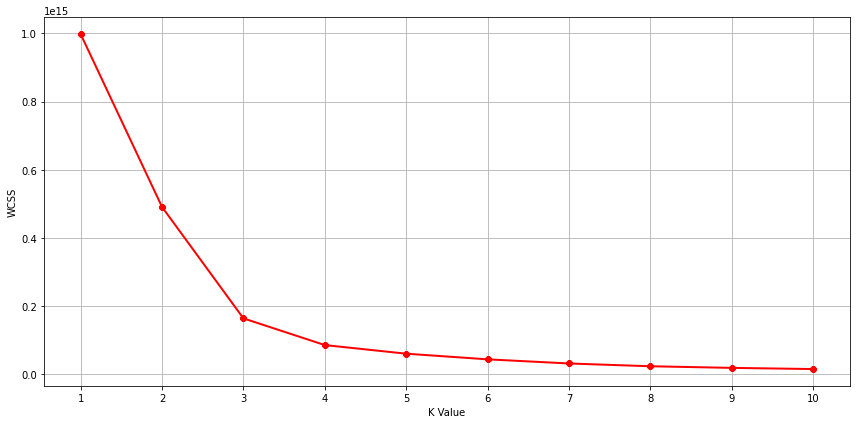

In [501]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

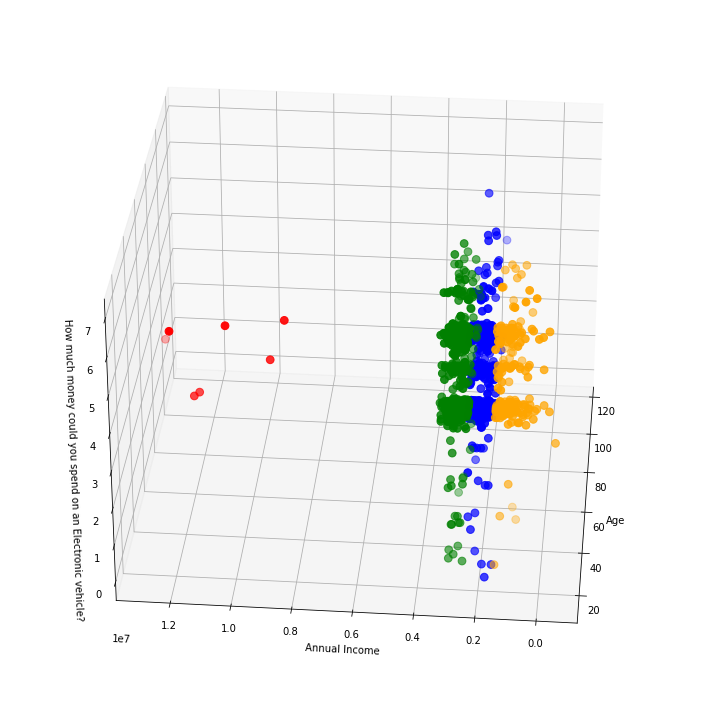

In [502]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_Original["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [503]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,30,12,1,1,0,5,1193875.647,0,3,2,4,6,2,0,3
1,27,19,1,1,0,4,1844540.398,2,3,2,3,4,4,2,0
2,32,10,1,1,0,4,2948150.113,2,1,2,5,4,4,2,2
3,55,19,0,1,0,3,2832379.739,0,1,1,4,6,4,1,2
4,26,21,1,1,0,4,2638750.576,2,4,2,10,4,4,2,2


In [504]:
df1=df_Original.copy()
df1

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,3
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",0
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years",2
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years",2
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years",0
996,996,29,Pune,None,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years",0
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",0
998,998,24,Ahmedabad,None,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years",0


In [505]:
df1["City"] = df1["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["City"] = df1["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["City"] = df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"] = df1["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["City"] = df1["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["City"] = df1["City"].replace({"nashik":"Nashik"})

In [506]:
df1['Cluster'].value_counts() 

2    430
0    368
3    195
1      7
Name: Cluster, dtype: int64

**More customers belong to Cluster 3**

In [507]:
# Segregrating each cluster

Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

(430, 16)

In [508]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3), 
 Cluster_3['Age'].value_counts().head(3)]

[29    45
 28    42
 30    37
 Name: Age, dtype: int64,
 30    2
 26    1
 29    1
 Name: Age, dtype: int64,
 29    47
 28    43
 30    43
 Name: Age, dtype: int64,
 31    28
 30    23
 29    23
 Name: Age, dtype: int64]

# Age group of 28-31 are to be targeted

In [509]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(), 
 Cluster_2['City'].value_counts().head(), 
 Cluster_3['City'].value_counts().head()]

[Pune         231
 New Delhi     18
 Mumbai        17
 Haldwani      11
 Satara         9
 Name: City, dtype: int64,
 Pune         4
 Mumbai       2
 Ahmedabad    1
 Name: City, dtype: int64,
 Pune         279
 New Delhi     28
 Mumbai        23
 Bengaluru     12
 Haldwani      10
 Name: City, dtype: int64,
 Pune         107
 Mumbai        14
 New Delhi     11
 Haldwani       6
 Chennai        6
 Name: City, dtype: int64]

In [510]:
#Pune & Mumbai are present in all the clusters, 
#New Delhi & Haldwani are present in 3 of 4 clusters,
#Satara & Bengaluru are present in 1 of the 4 clusters

# 'Pune' & 'Mumbai' are the most suitable location to create the early market in EV segment.
## 'New Delhi' & 'Haldwani' should be next priority.
### Followed by 'Satara' & 'Bengaluru'.

> ***The City should also have enough charging stations, will try to analyse Sanctioned Charging stations in India Dataset.***

In [511]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(), 
 Cluster_3['Profession'].value_counts().head()]

[None                    161
 Working Professional    132
 Business                 61
 Salaried                 14
 Name: Profession, dtype: int64,
 None                    5
 Working Professional    1
 Business                1
 Name: Profession, dtype: int64,
 None                    207
 Working Professional    135
 Business                 73
 Salaried                 15
 Name: Profession, dtype: int64,
 None                    87
 Working Professional    68
 Business                32
 Salaried                 8
 Name: Profession, dtype: int64]

****Salaried people are very less interested in EV vehicles.****

In [512]:
[Cluster_0['Annual Income'].mean(), 
 Cluster_1['Annual Income'].mean(), 
 Cluster_2['Annual Income'].mean(), 
 Cluster_3['Annual Income'].mean()]

[2064995.870350378, 10737228.104106281, 2812149.7606071676, 1097632.5625596757]

# Cluster 3 customers have Higher Average Income(Rs. 2812149.76), Cluster 1 have lower Average Income

In [513]:
[Cluster_0['Marital Status'].value_counts().head(), 
 Cluster_1['Marital Status'].value_counts().head(), 
 Cluster_2['Marital Status'].value_counts().head(), 
 Cluster_3['Marital Status'].value_counts().head()]

[Single     220
 Married    148
 Name: Marital Status, dtype: int64,
 Married    5
 Single     2
 Name: Marital Status, dtype: int64,
 Single     283
 Married    147
 Name: Marital Status, dtype: int64,
 Single     133
 Married     62
 Name: Marital Status, dtype: int64]

In [514]:
m=Cluster_3[Cluster_3['Marital Status']=='Single']
m['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      93
Maybe    25
No       15
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

# Single Marital Status people should be Targeted

In [515]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

[Graduate         260
 Post Graduate    108
 Name: Education, dtype: int64,
 Graduate         5
 Post Graduate    2
 Name: Education, dtype: int64,
 Graduate         298
 Post Graduate    132
 Name: Education, dtype: int64,
 Graduate         130
 Post Graduate     65
 Name: Education, dtype: int64]

In [517]:
e=Cluster_3[Cluster_3['Education']=='Graduate']
e['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      87
Maybe    27
No       16
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

# Graduates are more interested in replacing vehicles to EV

In [518]:
print(Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))

SUV          176
Sedan         84
Hatchback     55
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV          3
Sedan        2
Hatchback    1
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV          191
Sedan        115
Hatchback     62
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64
SUV         97
Sedan       39
Liftback    30
Name: If Yes/Maybe what type of  EV would you prefer?, dtype: int64


# People are more interedted in buying SUV's, followed by Sedan and Hatchback in EV Segments

In [519]:
print(Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head(2))
print(Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head(2))
print(Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head(2))
print(Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head(2))

<15 lakhs    162
<5 lakhs     105
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    3
<5 lakhs     3
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    216
<5 lakhs     127
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    102
<5 lakhs      53
Name: How much money could you spend on an Electronic vehicle?, dtype: int64


## By this,we can infer most customers want to invest less than 15 lakhs for their EV. 
## Considering SUV, Sedan and Hatchback as most preferred vehicle type.
# Company should focus on 'Sedan' in range products in price range between '5 lakhs & 15 lakhs'